# Lab 1 : Spatial Autocorrelation

In [3]:
# We import our libraries here
library(raster)
library(ggmap)
library(maps)
library(spdep)
library(classInt)
library(rgdal)
library(RColorBrewer)
library(ggplot2)
library(dplyr)
library(broom)

rgdal: version: 1.2-16, (SVN revision 701)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.3, released 2017/20/01
 Path to GDAL shared files: /Library/Frameworks/GDAL.framework/Versions/2.1/Resources/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.1, 04 March 2015, [PJ_VERSION: 491]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.2-5 


In [4]:
# Read the shape file from the data directory. 
# You'll need to make sure you have a folder called "data" 
# in the same directory as your lab folder

s1 <- readOGR("data/akCity_CAU01_ethnic.shp")

OGR data source with driver: ESRI Shapefile 
Source: "data/akCity_CAU01_ethnic.shp", layer: "akCity_CAU01_ethnic"
with 101 features
It has 14 fields
Integer64 fields read as strings:  POLY_ID SUM_EUROPE SUM_MAORI SUM_PACIFI SUM_ASIAN SUM_OTHER SUM_TOTAL 


In [4]:
#Let's see a summary of our spatial data

summary(s1)


Object of class SpatialPolygonsDataFrame
Coordinates:
      min     max
x 2658430 2679068
y 6469654 6483715
Is projected: TRUE 
proj4string :
[+proj=nzmg +lat_0=-41 +lon_0=173 +x_0=2510000 +y_0=6023150
+datum=nzgd49 +units=m +no_defs +ellps=intl
+towgs84=59.47,-5.04,187.44,0.47,-0.1,1.024,-4.5993]
Data attributes:
    POLY_ID       CAU_ID                   FIRST_CAU_   SUM_EUROPE   SUM_MAORI 
 1      : 1   514000 : 1   Abbotts Park         : 1   1837   : 2   113    : 3  
 10     : 1   514101 : 1   Akarana              : 1   1096   : 1   160    : 3  
 100    : 1   514102 : 1   Arch Hill            : 1   1128   : 1   65     : 3  
 101    : 1   514103 : 1   Auckland Central East: 1   1129   : 1   306    : 2  
 11     : 1   514200 : 1   Auckland Central West: 1   1135   : 1   310    : 2  
 12     : 1   514301 : 1   Auckland Harbourside : 1   1157   : 1   74     : 2  
 (Other):95   (Other):95   (Other)              :95   (Other):94   (Other):86  
   SUM_PACIFI   SUM_ASIAN    SUM_OTHER    SU

In [5]:
#names function gives you the header (first row) of your data

names(s1)

[1] "POLY_ID"    "CAU_ID"     "FIRST_CAU_" "SUM_EUROPE" "SUM_MAORI" 
 [6] "SUM_PACIFI" "SUM_ASIAN"  "SUM_OTHER"  "SUM_TOTAL"  "PC_EUROPEA"
[11] "PC_MAORI"   "PC_PACIFIC" "PC_ASIAN"   "PC_OTHER"

In [6]:
#The data frame -> row and header of data, in "tabular" format
#let's make df the dataframe
df <- data.frame(s1)
df

,POLY_ID,CAU_ID,FIRST_CAU_,SUM_EUROPE,SUM_MAORI,SUM_PACIFI,SUM_ASIAN,SUM_OTHER,SUM_TOTAL,PC_EUROPEA,PC_MAORI,PC_PACIFIC,PC_ASIAN,PC_OTHER
0,1,514000,Freemans Bay,3002,339,262,182,289,4074,73.7,8.3,6.4,4.5,7.1
1,2,514101,Auckland Harbourside,995,49,42,310,173,1569,63.4,3.1,2.7,19.8,11.0
2,3,514102,Auckland Central West,1587,180,89,1062,489,3407,46.6,5.3,2.6,31.2,14.4
3,4,514103,Auckland Central East,1595,159,79,1309,526,3668,43.5,4.3,2.2,35.7,14.3
4,5,514200,Newton,529,65,28,131,118,871,60.7,7.5,3.2,15.0,13.5
5,6,514301,Grafton West,536,65,37,351,89,1078,49.7,6.0,3.4,32.6,8.3
6,7,514302,Grafton East,479,79,81,313,106,1058,45.3,7.5,7.7,29.6,10.0
7,8,514401,Roberton,2418,479,763,821,448,4929,49.1,9.7,15.5,16.7,9.1
8,9,514402,Glenavon,2039,536,1326,1311,407,5619,36.3,9.5,23.6,23.3,7.2
9,10,514500,New Windsor,2991,338,599,1835,382,6145,48.7,5.5,9.7,29.9,6.2


## Plotting the data on a map

### Using plot

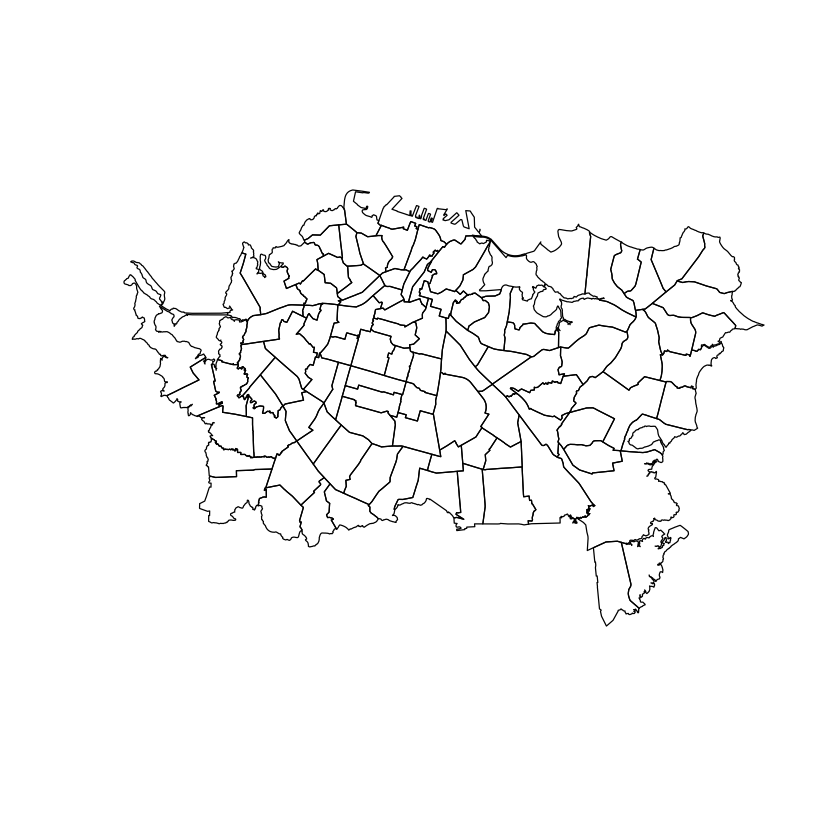

In [8]:
# Test plot the dataset using plot
plot(s1['PC_ASIAN'])


Note that the above has no color -- we need to add breaks 
to the data and do some extra work in plot to get color. Fortunately there are two libraries in R that do a lot of out of the box geospatial work

### Using spplot

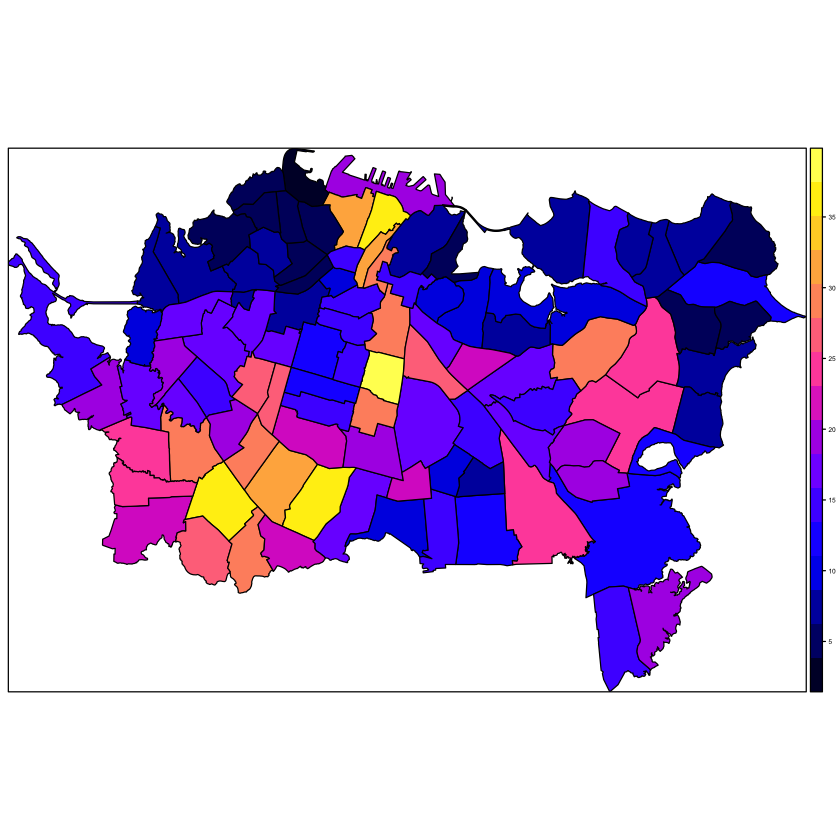

In [7]:
# We can also use spplot for this, a geospatial package for R
# spplot(data, column, legend settings)
spplot(s1, z="PC_ASIAN", par.settings=list(fontsize=list(text=5)))

### Using ggplot

In [9]:
# Some people prefer ggplot, which has greater control over legends than spplot 
# and a lot more features since it's a general graphics library.
# The only issue is that ggplot needs the data as a dataframe rather than reading it as a shapefile
# ggplot(data = my_data_frame, mapping = aes(x = name_of_column_with_x_value, 
#      y = name_of_column_with_y_value)) + geom_point()
#s1
#s1@data$id = rownames(s1@data)

In [10]:
#s1df.poly <- fortify(s1, region="id")
#s1df
#s1_df = left_join(df, s1@data, by="id")
#s1_df
#ggplot(s1_df, aes(long,lat,group=group))
#ggplot()
#spplot(s1, z="PC_ASIAN", par.settings=list(fontsize=list(text=10)))

## Equal Intervals Map

In [11]:
#First, let's make breaks in the data by using classIntervals()
#See https://www.rdocumentation.org/packages/classInt/versions/0.1-24/topics/classIntervals for
#Documentation of all options above


# 7 breaks, since we set n=7 in options below
brks <-  classIntervals(s1$PC_ASIAN, n = 7, style = "equal")$brks
brks 

brks[length(brks)] <- brks[length(brks)] + 1

[1]  3.800000  8.614286 13.428571 18.242857 23.057143 27.871429 32.685714
[8] 37.500000

In [12]:
# Custom colors using brewer
pal  <- brewer.pal(length(brks), "Blues")

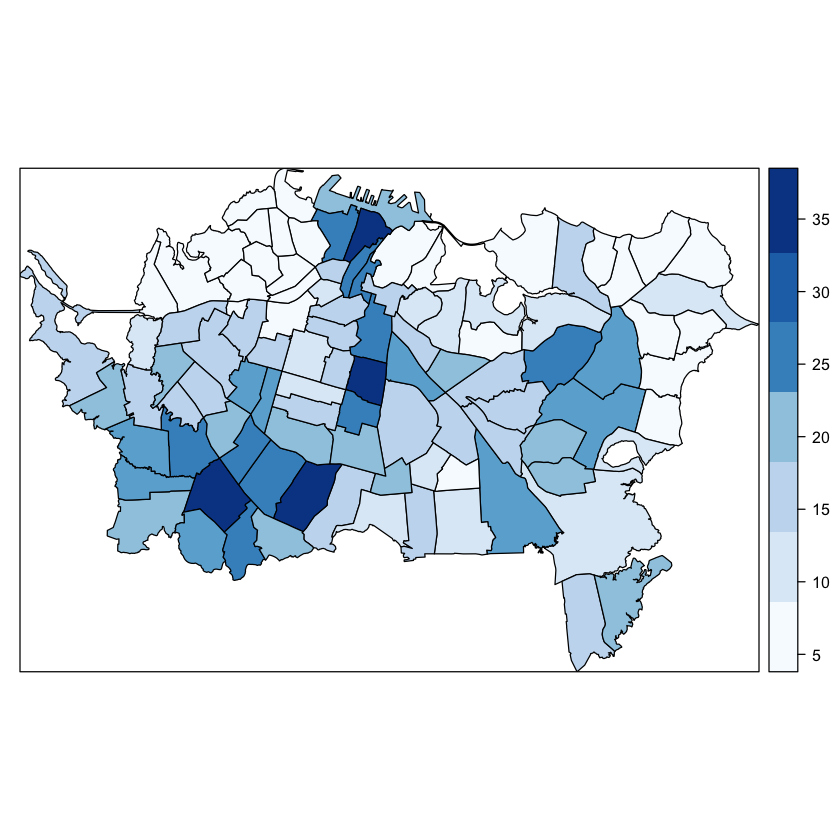

In [13]:

# Generate the map
spplot(s1, z="PC_ASIAN", at = brks, col.regions=pal)

## Standard Deviations Map

[1]  3.357102  7.693514 12.029925 16.366337 20.702748 25.039159 29.375571
[8] 33.711982 39.048394

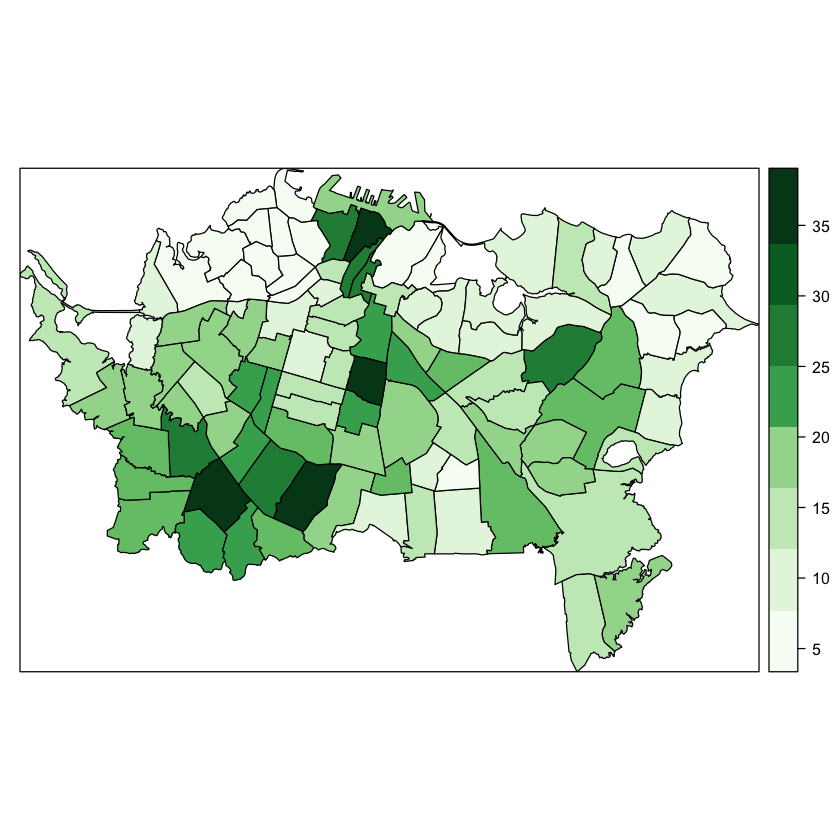

In [14]:
# Generate breaks
brks <-  classIntervals(s1$PC_ASIAN, style = "sd")$brks
brks[length(brks)] <- brks[length(brks)] + 1
brks
# Define color swatches
pal  <- brewer.pal(length(brks), "Greens")

# Generate the map
spplot(s1, z="PC_ASIAN", at = brks, col.regions=pal)

## Quantiles Map

[1]  3.80  6.55  8.40 12.20 15.40 18.00 22.10 28.15 38.50

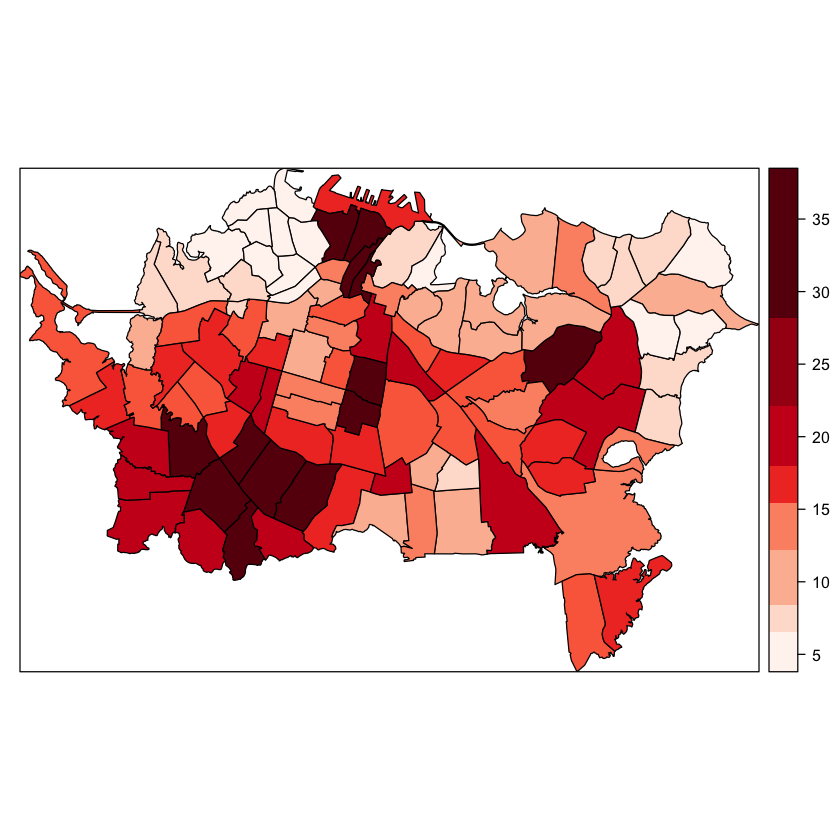

In [15]:
# Generate breaks
brks <-  classIntervals(s1$PC_ASIAN, style = "quantile")$brks
brks[length(brks)] <- brks[length(brks)] + 1
brks
# Define color swatches
pal  <- brewer.pal(length(brks), "Reds")

# Generate the map
spplot(s1, z="PC_ASIAN", at = brks, col.regions=pal)

## Natural Breaks (Jenks) map

In [16]:
# Generate breaks
brks <-  classIntervals(s1$PC_ASIAN, style = "fisher")$brks
brks[length(brks)] <- brks[length(brks)] + 1
brks
# Define color swatches
pal  <- brewer.pal(length(brks), "Purples")

# Generate the map
map <- spplot(s1, z="PC_ASIAN", at = brks, col.regions=pal)

#s1$PC_ASIAN

[1]  3.80  6.55  9.45 12.80 16.90 21.20 26.05 31.55 38.50

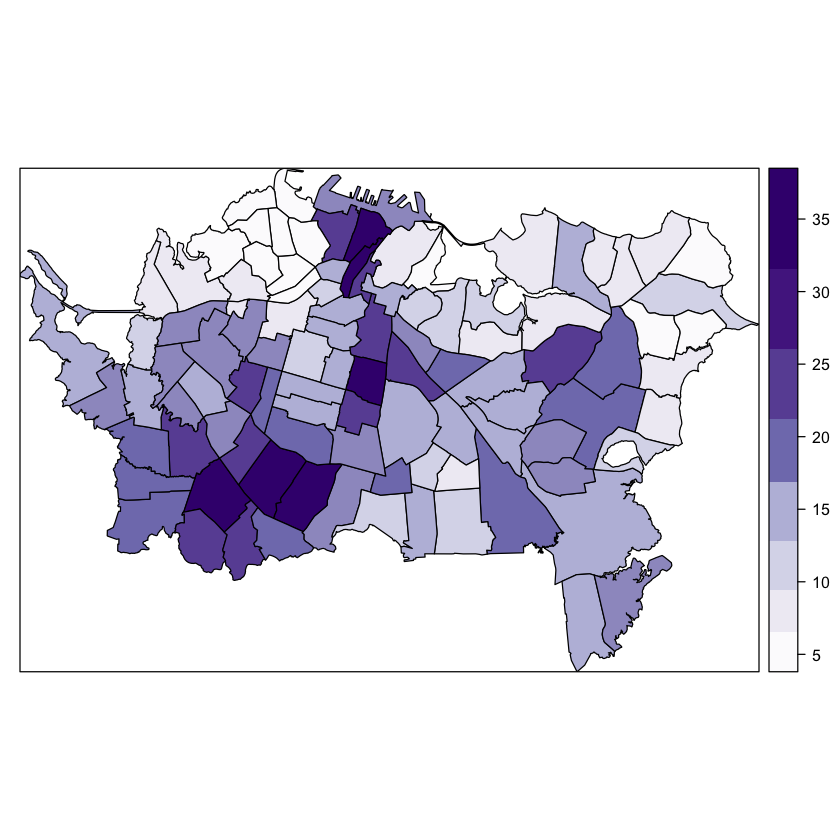

In [17]:
# Since "map" is assigned as the plot, calling map here displays it
map

# Graphing the data

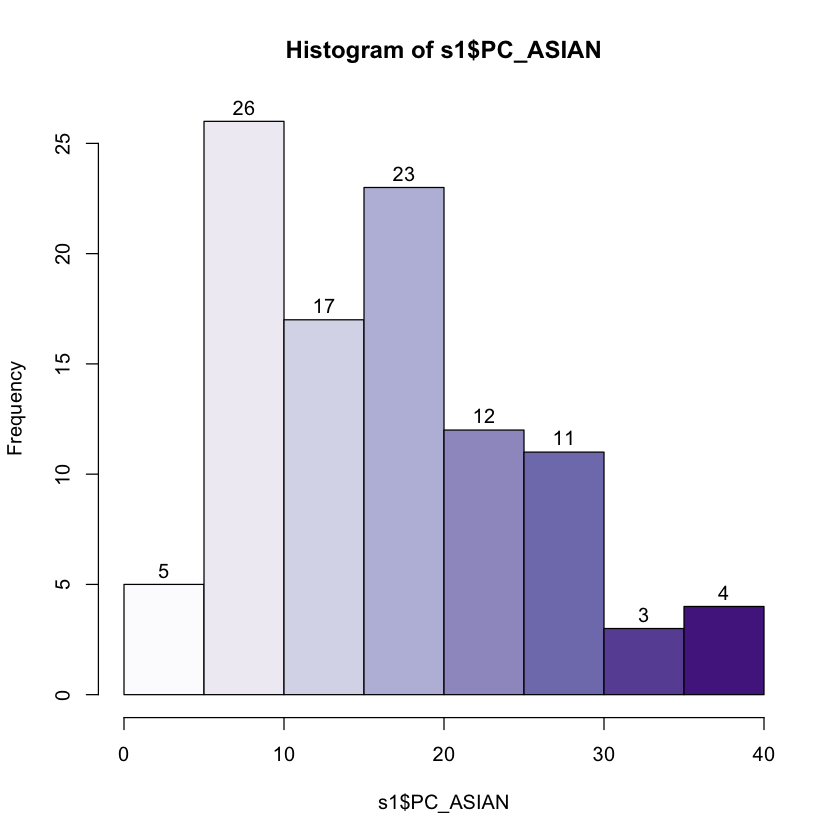

In [18]:
#brks
#s1$PC_ASIAN

hist(s1$PC_ASIAN, freq = TRUE, right=TRUE, labels=TRUE,col=pal)

# Spatial autocorrelation

In [19]:
# Generate the weight matrix
# queen = False option means at least two boundary points must be 
# within the snap distance of each other
# with the conventional name of a ‘rook’ relationship.
# The snap option is the same as precision threshold in geoda

nb <- poly2nb(s1, row.names=s1$FIRST_CAU_, queen=FALSE, snap=1e-05)
length(nb)


[1] 101

In [20]:
#example of the first polygon in w, numbers are the neighbors for the first polygon

nb[1]
s1$FIRST_CAU_[1]


#make a summary of w
summary(nb)

[[1]]
[1]  3  5 21 23 25

[1] Freemans Bay
101 Levels: Abbotts Park Akarana Arch Hill ... Westmere

Neighbour list object:
Number of regions: 101 
Number of nonzero links: 498 
Percentage nonzero weights: 4.881874 
Average number of links: 4.930693 
Link number distribution:

 2  3  4  5  6  7  8  9 
 5 12 20 30 22  7  4  1 
5 least connected regions:
Rosebank Kohimarama West Glendowie Otahuhu East Otahuhu West with 2 links
1 most connected region:
Mt Wellington North with 9 links


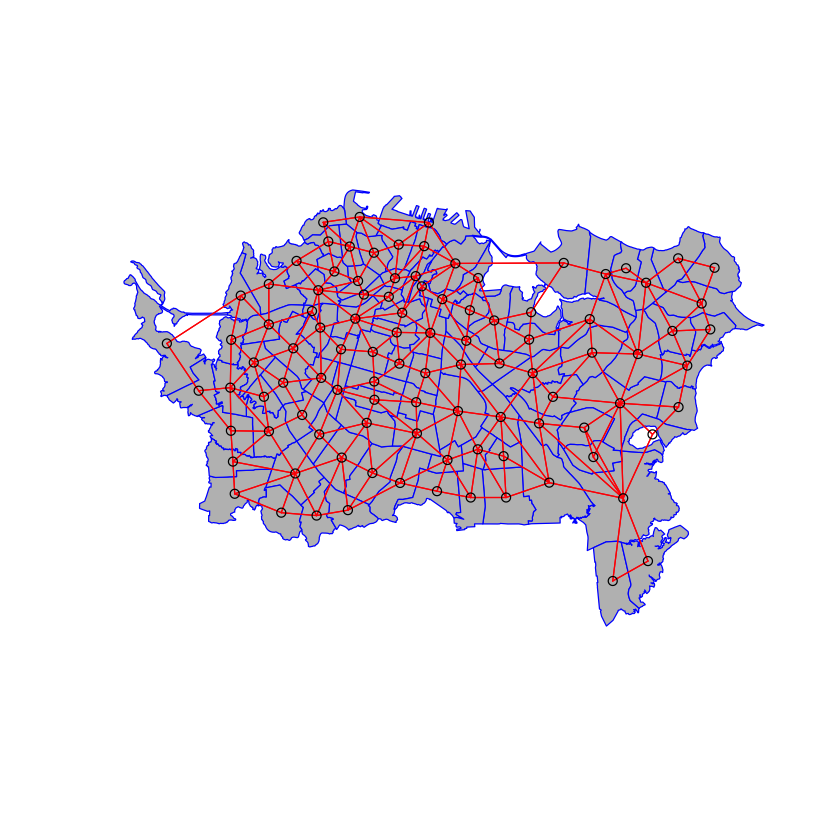

In [21]:
plot(s1, col='gray', border='blue', lwd=1)
xy <- coordinates(s1)
plot(nb, xy, col='red', lwd=1, add=TRUE)

In [22]:
#style = B indicates show the weights as binaries (0 or 1)
wm <- nb2mat(nb, style='B', zero.policy=TRUE)

In [23]:
#this is what the weight matrix looks like, since we set style=B.
#it's either 0 or 1 
wm

Freemans Bay,0,0,1,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Auckland Harbourside,0,0,1,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Auckland Central West,1,1,0,1,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Auckland Central East,0,1,1,0,1,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Newton,1,0,1,1,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Grafton West,0,0,0,1,1,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Grafton East,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Roberton,0,0,0,0,0,0,0,0,1,1,⋯,0,0,0,0,0,0,0,0,0,0
Glenavon,0,0,0,0,0,0,0,1,0,1,⋯,0,0,0,0,0,0,0,0,0,0
New Windsor,0,0,0,0,0,0,0,1,1,0,⋯,0,0,0,0,0,0,0,0,0,0
Avondale South,0,0,0,0,0,0,0,0,1,1,⋯,0,0,0,0,0,0,0,0,0,0


## Moran's *I* in equation form

$I = \frac{n}{\sum_{i=1}^n (y_i - \bar{y})^2} \frac{\sum_{i=1}^n \sum_{j=1}^n w_{ij}(y_i - \bar{y})(y_j - \bar{y})}{\sum_{i=1}^n \sum_{j=1}^n w_{ij}}$

In [24]:
# Let's first see what manual computation of Moran's I looks like

#n is the number of observations (length of our dataset)
n <- length(s1)

#we set y to the column of PC_ASIAN, then we get the mean.
y <- s1$PC_ASIAN
ybar <- mean(y)

#find the difference between y and ybar(the mean)
dy <- y - ybar
yi <- rep(dy, each=n)
yj <- rep(dy)
yiyj <- yi * yj

pm <- matrix(yiyj, ncol=n)

pmw <- pm * wm

spmw <- sum(pmw)

smw <- sum(wm)
sw  <- spmw / smw
vr <- n / sum(dy^2)
MI <- vr * sw

#Morans I
cat("Moran's I is", MI)

Moran's I is 0.4833353

In [25]:
# let's make a weights object so that we 
# can use it with a less manual way of computing moran's i
lw <- nb2listw(nb, style="W", zero.policy=TRUE)
lw
length(lw)

Characteristics of weights list object:
Neighbour list object:
Number of regions: 101 
Number of nonzero links: 498 
Percentage nonzero weights: 4.881874 
Average number of links: 4.930693 

Weights style: W 
Weights constants summary:
    n    nn  S0       S1       S2
W 101 10201 101 43.55156 414.9739

[1] 3

In [26]:
summary(lw)

Characteristics of weights list object:
Neighbour list object:
Number of regions: 101 
Number of nonzero links: 498 
Percentage nonzero weights: 4.881874 
Average number of links: 4.930693 
Link number distribution:

 2  3  4  5  6  7  8  9 
 5 12 20 30 22  7  4  1 
5 least connected regions:
Rosebank Kohimarama West Glendowie Otahuhu East Otahuhu West with 2 links
1 most connected region:
Mt Wellington North with 9 links

Weights style: W 
Weights constants summary:
    n    nn  S0       S1       S2
W 101 10201 101 43.55156 414.9739


s1$sPC_ASIAN 
   0.5007802

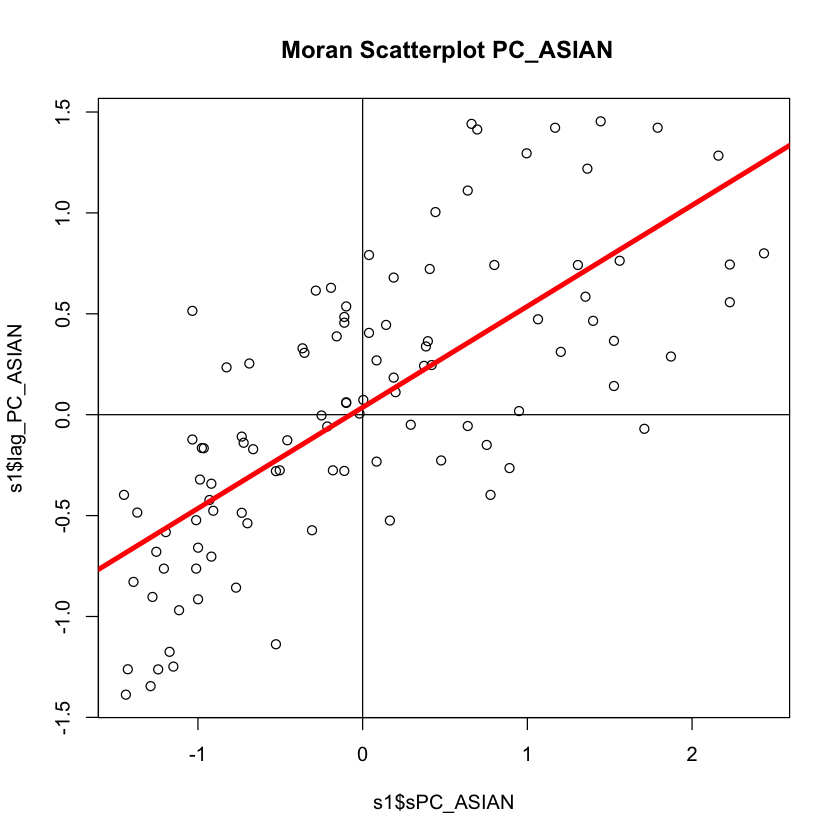

In [27]:
s1$sPC_ASIAN <- scale(s1$PC_ASIAN) 

s1$lag_PC_ASIAN <- lag.listw(lw, s1$sPC_ASIAN,zero.policy=TRUE)

plot(x = s1$sPC_ASIAN, y = s1$lag_PC_ASIAN, main = " Moran Scatterplot PC_ASIAN")
abline(h = 0, v = 0)
abline(lm(s1$lag_PC_ASIAN ~ s1$sPC_ASIAN), lty = 1, lwd = 4, col = "red")

#Note that the slope of the regression line is nearly the same as Moran's I
slope <- lm(s1$lag_PC_ASIAN ~ s1$sPC_ASIAN)
coefficients(slope)[2]


In [28]:
moran(s1$PC_ASIAN,lw, n=length(lw$neighbours), S0=Szero(lw))

$I
[1] 0.5007802

$K
[1] 2.385732

In [29]:
moran.test(s1$PC_ASIAN, lw, randomisation=FALSE)


	Moran I test under normality

data:  s1$PC_ASIAN  
weights: lw  

Moran I statistic standard deviate = 8.0152, p-value = 5.498e-16
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
      0.500780175      -0.010000000       0.004061069 


In [30]:
moran.mc(s1$PC_ASIAN, lw, nsim=299)


	Monte-Carlo simulation of Moran I

data:  s1$PC_ASIAN 
weights: lw  
number of simulations + 1: 300 

statistic = 0.50078, observed rank = 300, p-value = 0.003333
alternative hypothesis: greater


# Univariate Local Moran’s I

In [31]:
# We use the localmoran function instead of moran
locm <- localmoran(s1$PC_ASIAN,lw)
summary(locm)

       Ii                E.Ii           Var.Ii            Z.Ii         
 Min.   :-0.53724   Min.   :-0.01   Min.   :0.1008   Min.   :-1.44873  
 1st Qu.: 0.01269   1st Qu.:-0.01   1st Qu.:0.1562   1st Qu.: 0.05214  
 Median : 0.21922   Median :-0.01   Median :0.1894   Median : 0.52676  
 Mean   : 0.50078   Mean   :-0.01   Mean   :0.2148   Mean   : 1.13322  
 3rd Qu.: 0.79899   3rd Qu.:-0.01   3rd Qu.:0.2391   3rd Qu.: 1.64412  
 Max.   : 2.80067   Max.   :-0.01   Max.   :0.4881   Max.   : 7.72306  
   Pr(z > 0)      
 Min.   :0.00000  
 1st Qu.:0.05008  
 Median :0.29918  
 Mean   :0.28404  
 3rd Qu.:0.47921  
 Max.   :0.92629  

s1$sLPC_ASIAN 
    0.5007802

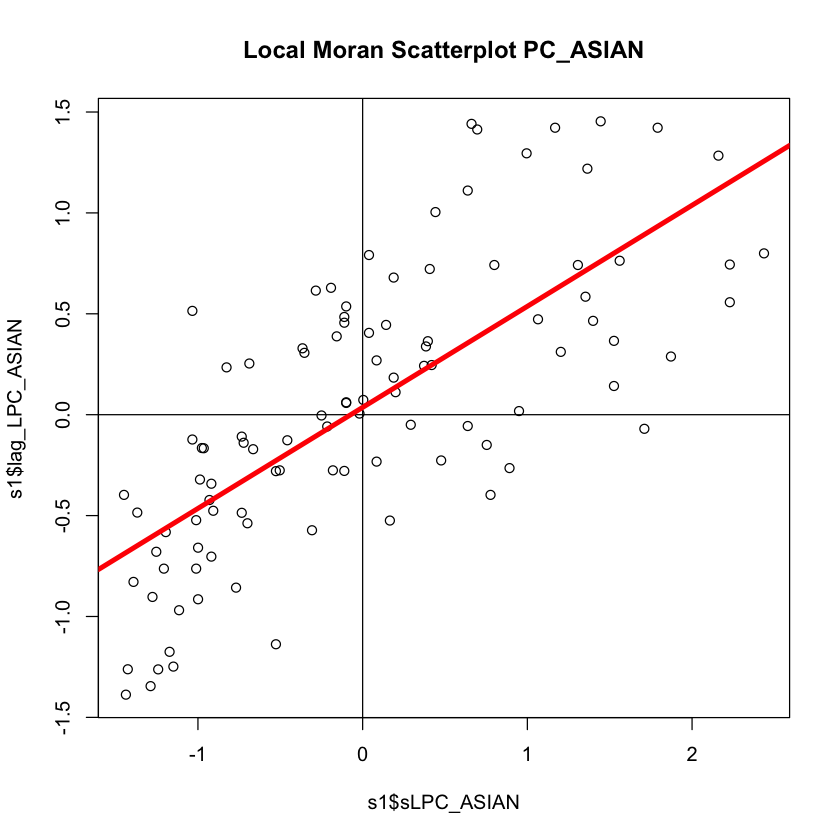

In [32]:
s1$sLPC_ASIAN <- scale(s1$PC_ASIAN) 

s1$lag_LPC_ASIAN <- lag.listw(lw, s1$sLPC_ASIAN,zero.policy=TRUE)

plot(x = s1$sLPC_ASIAN, y = s1$lag_LPC_ASIAN, main = "Local Moran Scatterplot PC_ASIAN")
abline(h = 0, v = 0)
abline(lm(s1$lag_LPC_ASIAN ~ s1$sLPC_ASIAN), lty = 1, lwd = 4, col = "red")

#Note that the slope of the regression line is nearly the same as Moran's I
slope <- lm(s1$lag_LPC_ASIAN ~ s1$sLPC_ASIAN)
coefficients(slope)[2]


In [33]:
# identify the moran plot quadrant for each observation to make the cluster map
s1$QUAD_SIG <- NA
s1@data[(s1$sLPC_ASIAN >= 0 & s1$lag_LPC_ASIAN >= 0) & (locm[, 5] <= 0.05), "QUAD_SIG"] <- 1
s1@data[(s1$sLPC_ASIAN <= 0 & s1$lag_LPC_ASIAN <= 0) & (locm[, 5] <= 0.05), "QUAD_SIG"] <- 2
s1@data[(s1$sLPC_ASIAN >= 0 & s1$lag_LPC_ASIAN <= 0) & (locm[, 5] <= 0.05), "QUAD_SIG"] <- 3
s1@data[(s1$sLPC_ASIAN >= 0 & s1$lag_LPC_ASIAN <= 0) & (locm[, 5] <= 0.05), "QUAD_SIG"] <- 4
s1@data[(s1$sLPC_ASIAN <= 0 & s1$lag_LPC_ASIAN >= 0) & (locm[, 5] <= 0.05), "QUAD_SIG"] <- 5  
#5 are non significant observations

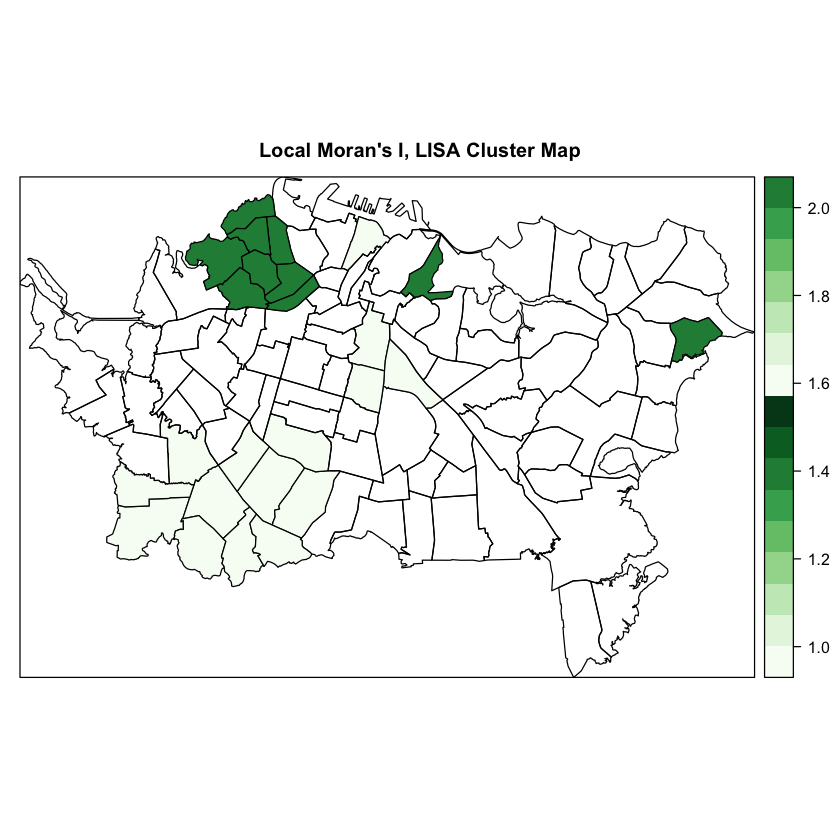

In [35]:

# Set the breaks for the thematic map classes
# We use the seq function to generation a sequence from 1-5, going up by 1.
# you could also use 
breaks <- c(1,2,3,4,5)

# Set the corresponding labels for the thematic map classes
labels <- c("high-High", "low-Low", "High-Low", "Low-High", "Not Signif.")

# Define color swatches
pal  <- brewer.pal(length(brks), "Greens")

#colors <- c("red", "blue", "lightpink", "skyblue2", "white")

# Generate the map
spplot(s1, z="QUAD_SIG",
        col.regions=pal, main=list(label="Local Moran's I, LISA Cluster Map",cex=1))

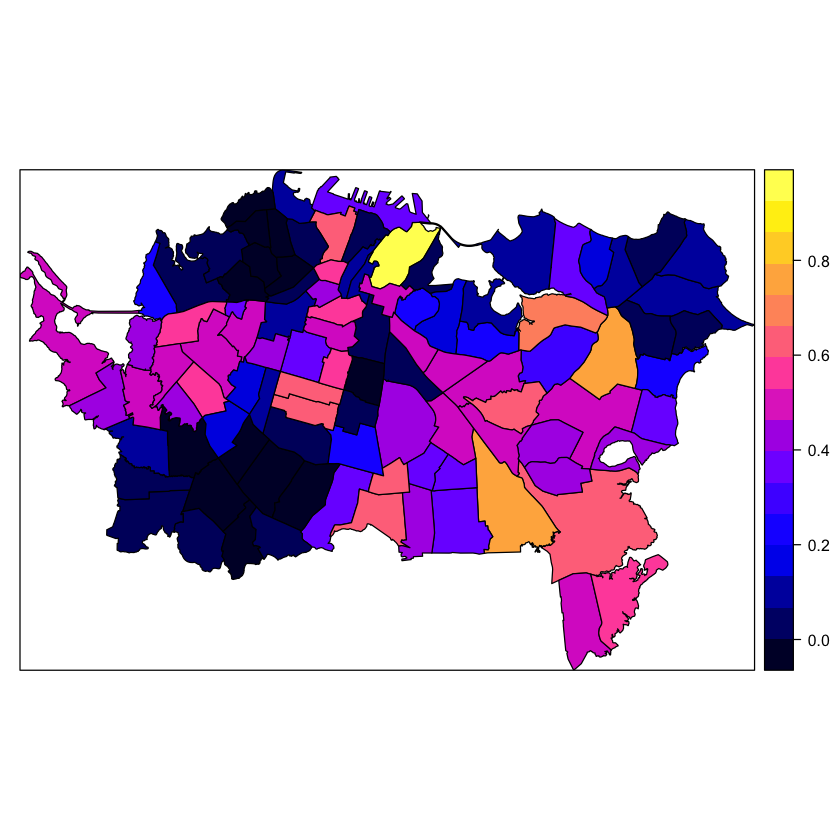

In [37]:
# identify the moran plot quadrant for each observation to make the P-significance cluster map
s1$P_SIG <- 0
s1$P_SIGB <- 0
#locm[, 5]
#s1$sLPC_ASIAN >= 0 
#s1$lag_LPC_ASIAN
#locm[,5]
#locm

s1@data['P_SIG'] <- locm[, 5]

#breaks <- findInterval(s1$P_SIG, breaks)

#breaks <- c(0,0.0001,0.001,0.01,0.05)
#breaks <- classIntervals(s1$P_SIG, n=5, style="fixed", fixedBreaks=c(0.0001,0.001,0.01,0.05))
#pal  <- colorRampPalette(brewer.pal(breaks, "Greens"))
#classIntervals(s1$PC_ASIAN, n = 7, style = "equal")$brks

#spplot(s1, c('P_SIG'), cut)
spplot(s1, z='P_SIG') 
#main=list(label="Local Moran's I, LISA Cluster Map",cex=1))
#s1@data[(s1$sLPC_ASIAN >= 0 & s1$lag_LPC_ASIAN >= 0) & (locm[, 5] <= 0.05), "P_SIG"] <- 1
#s1@data[(s1$sLPC_ASIAN <= 0 & s1$lag_LPC_ASIAN <= 0) & (locm[, 5] <= 0.05), "P_SIG"] <- 2
#s1@data[(s1$sLPC_ASIAN >= 0 & s1$lag_LPC_ASIAN <= 0) & (locm[, 5] <= 0.05), "P_SIG"] <- 3
#s1@data[(s1$sLPC_ASIAN >= 0 & s1$lag_LPC_ASIAN <= 0) & (locm[, 5] <= 0.05), "P_SIG"] <- 4
#s1@data[(s1$sLPC_ASIAN <= 0 & s1$lag_LPC_ASIAN >= 0) & (locm[, 5] <= 0.05), "P_SIG"] <- 5 

#s1@data